In [533]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Gathering Data

In [534]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image_predictions.tsv', 'wb') as f:
    f.write(r.content)

data_predictions = pd.read_csv('image_predictions.tsv', sep='\t')


In [535]:
data_tweet_stats = pd.read_json('tweet-json.txt', lines=True)


In [536]:
data_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

#### Copying data

In [537]:
df_predictions = data_predictions.copy()
df_tweet_stats = data_tweet_stats.copy()
df_enhanced = data_enhanced.copy()

## Assessing Data

In [538]:
df_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [539]:
df_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [540]:
print(df_predictions[(df_predictions['p1_conf'] > 1) | (df_predictions['p2_conf'] > 1) | (df_predictions['p3_conf'] > 1)].sum().sum())


0.0


In [541]:
df_predictions.isna().sum().sum()


np.int64(0)

In [542]:
df_predictions.duplicated().sum()


np.int64(0)

In [543]:
df_tweet_stats.head()


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [544]:
df_tweet_stats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [545]:
df_tweet_stats.isna().sum().sum()


np.int64(30513)

In [546]:
df_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN


In [547]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [548]:
df_enhanced.isna().sum().sum()

np.int64(20915)

In [549]:
df_enhanced.duplicated().sum()

np.int64(0)

In [550]:
print(df_enhanced['timestamp'].dtype)

object


In [551]:
# Make copies of the original data before cleaning
df_predictions_original = df_predictions.copy()
df_tweet_stats_original = df_tweet_stats.copy()
df_enhanced_original = df_enhanced.copy()

## Cleaning Data

### Tideness

#### Define:

filter each dataset

#### Code:

In [552]:
df_predictions = df_predictions[['tweet_id', 'p1', 'p1_conf', 'p1_dog']]

In [553]:
df_tweet_stats = df_tweet_stats[['id', 'retweet_count', 'favorite_count']]

In [554]:
df_enhanced = df_enhanced[['tweet_id', 'timestamp', 'rating_numerator']]

#### Test:

In [555]:
df_predictions.info()
df_tweet_stats.info()
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   p1        2075 non-null   object 
 2   p1_conf   2075 non-null   float64
 3   p1_dog    2075 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 50.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2356 no

#### Define:

changing timestamp type from object to datetime

#### Code:

In [556]:
df_enhanced['timestamp'] = df_enhanced['timestamp'].astype('datetime64[ns, UTC]')

#### Test:

In [557]:
df_enhanced['timestamp'].dtype

datetime64[ns, UTC]

### Quility

#### Define:

drop any duplicates row in dataframe

#### Code:

In [558]:
df_predictions.drop_duplicates(inplace=True)

In [559]:
df_tweet_stats.drop_duplicates(inplace=True)

In [560]:
df_enhanced.drop_duplicates(inplace=True)

#### Test:

In [561]:
df_predictions.duplicated().sum()
df_tweet_stats.duplicated().sum()

np.int64(0)

#### Define:

drop any nulls from dataframe

#### Code:

In [562]:
df_predictions.dropna(inplace=True)

In [563]:
df_tweet_stats.dropna(inplace=True)

#### Test:

In [564]:
df_predictions.isna().sum().sum()
df_tweet_stats.isna().sum().sum()

np.int64(0)

#### Define

filter dataframe predictions for any tweet that isnt a dog

#### Code:

In [565]:
df_predictions = df_predictions[df_predictions['p1_dog'] == True]

#### Test:

In [566]:
df_predictions['p1_dog'].value_counts()

p1_dog
True    1532
Name: count, dtype: int64

#### Define:

filter dataframe predictions for any tweet that that ai isnt sure that it is dog or not

#### Code:

In [567]:
df_predictions = df_predictions[df_predictions['p1_conf'] > 0.2]

#### Test:

In [568]:
(df_predictions['p1_conf'] < 0.2).value_counts()

p1_conf
False    1447
Name: count, dtype: int64

#### Define:

drop outlayers of the ratings

#### Code:

In [569]:
df_enhanced[df_enhanced['rating_numerator'] > 20].drop(['rating_numerator'], axis=1, inplace=True)

C:\Users\Omar Moammed\AppData\Local\Temp\ipykernel_7180\2853056160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enhanced[df_enhanced['rating_numerator'] > 20].drop(['rating_numerator'], axis=1, inplace=True)


#### Test:

In [518]:
sorted_df_enhanced = df_enhanced.sort_values(by='rating_numerator', ascending=False)
sorted_df_enhanced.head(10)

,tweet_id,timestamp,rating_numerator
979,749981277374128128,2016-07-04 15:00:45+00:00,1776
313,835246439529840640,2017-02-24 21:54:03+00:00,960
189,855860136149123072,2017-04-22 19:05:32+00:00,666
188,855862651834028034,2017-04-22 19:15:32+00:00,420
2074,670842764863651840,2015-11-29 05:52:33+00:00,420
1120,731156023742988288,2016-05-13 16:15:54+00:00,204
290,838150277551247360,2017-03-04 22:12:52+00:00,182
902,758467244762497024,2016-07-28 01:00:57+00:00,165
1779,677716515794329600,2015-12-18 05:06:23+00:00,144
1634,684225744407494656,2016-01-05 04:11:44+00:00,143


#### Define:

making the rating to maximum 10

#### Code:

In [519]:
df_enhanced['rating_numerator'][df_enhanced['rating_numerator'] > 10] = 10

C:\Users\Omar Moammed\AppData\Local\Temp\ipykernel_7180\4274642497.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_enhanced['rating_numerator'][df_enhanced['rating_numerator'] > 10] = 10
C:\Users\Omar Moammed\AppData\Local\Temp\ipyker

#### Test:

In [520]:
df_enhanced['rating_numerator'].value_counts()

rating_numerator
10    1916
9      158
8      102
7       55
5       37
6       32
3       19
4       17
1        9
2        9
0        2
Name: count, dtype: int64

### Continue of Tideness issue

#### Define:

Merging each dataframe set to a one dataframe

#### Code:

In [521]:
df = pd.merge(right=df_tweet_stats, left=df_predictions, right_on='id', left_on='tweet_id', how= 'inner')
df = pd.merge(right=df, left=df_enhanced, right_on='id', left_on='tweet_id', how= 'inner')

#### Test:

In [522]:
df.head()

,tweet_id_x,timestamp,rating_numerator,tweet_id_y,p1,p1_conf,p1_dog,id,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,10,892177421306343426,Chihuahua,0.323581,True,892177421306343426,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,10,891815181378084864,Chihuahua,0.716012,True,891815181378084864,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,10,891327558926688256,basset,0.555712,True,891327558926688256,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,10,891087950875897856,Chesapeake_Bay_retriever,0.425595,True,891087950875897856,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,10,890971913173991426,Appenzeller,0.341703,True,890971913173991426,2158,12041


#### Define:

drop useless id columns that came from each dataframe

#### Code:

In [523]:
df.drop('id', axis=1, inplace = True)
df.drop('tweet_id_y', axis=1, inplace = True)

#### Test:

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id_x        1446 non-null   int64              
 1   timestamp         1446 non-null   datetime64[ns, UTC]
 2   rating_numerator  1446 non-null   int64              
 3   p1                1446 non-null   object             
 4   p1_conf           1446 non-null   float64            
 5   p1_dog            1446 non-null   bool               
 6   retweet_count     1446 non-null   int64              
 7   favorite_count    1446 non-null   int64              
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(4), object(1)
memory usage: 80.6+ KB


#### Define:

renaming columns to be easily understandable

#### Code:

In [525]:
df.rename(
    columns={'tweet_id_x': 'id', 'p1': 'dog_type', 'rating_numerator': 'rating'},
    inplace=True
)

#### Test:

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              1446 non-null   int64              
 1   timestamp       1446 non-null   datetime64[ns, UTC]
 2   rating          1446 non-null   int64              
 3   dog_type        1446 non-null   object             
 4   p1_conf         1446 non-null   float64            
 5   p1_dog          1446 non-null   bool               
 6   retweet_count   1446 non-null   int64              
 7   favorite_count  1446 non-null   int64              
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(4), object(1)
memory usage: 80.6+ KB


## Storing Data

In [527]:
df.to_csv('twitter_archive_master.csv', index=False)


## Analyzing and Visualizing Data

 The most commonly predicted dog breed in the dataset is the golden retriever, followed by Labrador retriever and Pembroke.

In [528]:
df['dog_type'].value_counts()


dog_type
golden_retriever      147
Labrador_retriever     99
Pembroke               86
Chihuahua              79
pug                    56
                     ... 
groenendael             1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
Scottish_deerhound      1
Name: count, Length: 111, dtype: int64

 There’s a slight positive correlation (0.3) between the dog’s rating and tweet popularity, but it's not strong enough to say higher ratings consistently lead to higher engagement.

In [529]:
df['rating'].corr(df['retweet_count'])


np.float64(0.12878873169985663)

 This short report provides a summary of the number of occurrences for each dog breed with the highest rating (14). The top breeds like golden_retriever and Pembroke have the highest occurrences, each appearing 3 times.

In [530]:
top_rated = df[df['rating'] == df['rating'].max()]
top_rated['dog_type'].value_counts()


dog_type
golden_retriever      139
Labrador_retriever     91
Pembroke               81
Chihuahua              64
pug                    43
                     ... 
groenendael             1
Ibizan_hound            1
EntleBucher             1
standard_schnauzer      1
Scottish_deerhound      1
Name: count, Length: 109, dtype: int64

 This analyze provides retweet counts across different years. 2016 has the highest retweet count, followed by 2017, while 2015 has the lowest retweet count.

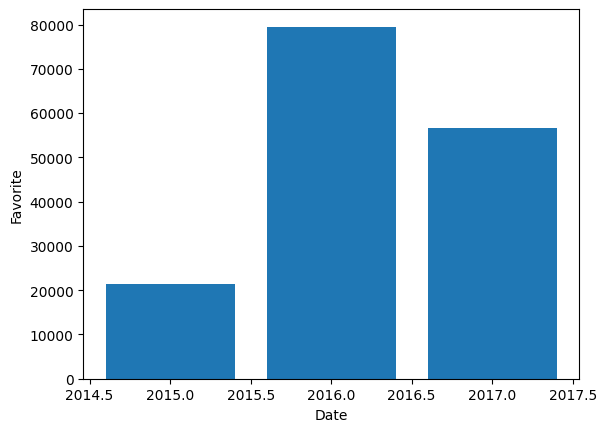

In [531]:
plt.bar(df['timestamp'].dt.year, df['retweet_count'])
plt.xlabel('Date')
plt.ylabel('Favorite')
plt.show()


 Golden Retrievers dominate tweets, but Pembrokes get higher ratings, suggesting breed choice impacts engagement differently

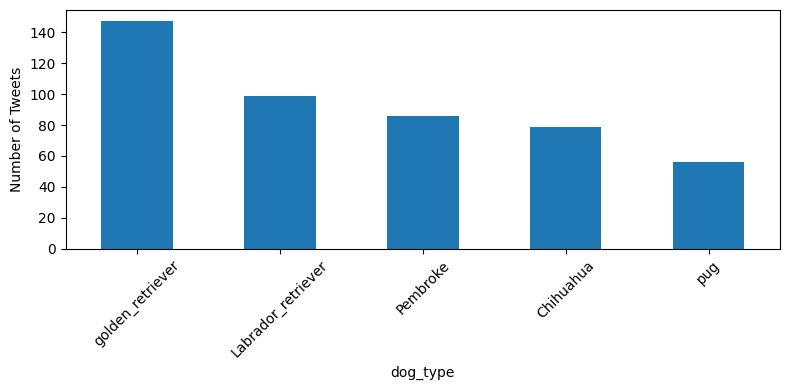

In [532]:
top_5 = df['dog_type'].value_counts().head(5)
plt.figure(figsize=(8,4))
top_5.plot(kind='bar')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()